### 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np

In [2]:
# K-Means 라이브러리
from sklearn.cluster import KMeans

# 시각화 라이브러리
import matplotlib.pyplot as plt
%matplotlib inline

### 데이터 불러오기

In [3]:
studentData = pd.read_csv("https://raw.githubusercontent.com/hyokwan/python-lecture/master/dataset/student_middle.csv")
studentData.head()

,NAME,SW,DB,AND
0,ST0001,95,30,0
1,ST0002,50,50,0
2,ST0003,15,30,15
3,ST0004,90,50,20
4,ST0005,75,20,20


### 1. 타입통합 / 특정 숫자 컬럼 추가

In [4]:
studentData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NAME    26 non-null     object
 1   SW      26 non-null     int64 
 2   DB      26 non-null     int64 
 3   AND     26 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 960.0+ bytes


### 2. 특성 선정 / 데이터 분리

#### 2-1. 특성 선정

In [5]:
featuresColumns = ["SW", "DB", "AND"]

#### 2-2. 데이터 분리

In [6]:
### 기본정보 가지고 있기
name = studentData[["NAME"]]

In [7]:
### 특성 정보 분리
features = studentData.loc[:, featuresColumns]

In [8]:
print(name.shape)
print(features.shape)

(26, 1)
(26, 3)


### 3. 모델 선언

In [9]:
### 모델 정의
modelMethod = KMeans(random_state=1, n_clusters=2)

In [10]:
model_kmeans = modelMethod.fit(features)

### 4. 모델 예측

In [11]:
model_kmeans.predict(features)

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [12]:
model_kmeans.fit_predict(features)

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [12]:
predict = pd.DataFrame(model_kmeans.predict(features))
predict.columns=["PREDICT"]

In [13]:
predict

,PREDICT
0,0
1,0
2,0
3,0
4,0
5,1
6,0
7,1
8,0
9,0


In [14]:
### name, feature, predict 붙이기
result = pd.concat([studentData, predict], axis = 1)

In [15]:
result

,NAME,SW,DB,AND,PREDICT
0,ST0001,95,30,0,0
1,ST0002,50,50,0,0
2,ST0003,15,30,15,0
3,ST0004,90,50,20,0
4,ST0005,75,20,20,0
5,ST0006,100,80,30,1
6,ST0007,15,10,30,0
7,ST0008,100,100,33,1
8,ST0009,65,60,35,0
9,ST0010,90,20,38,0


### 5. 시각화

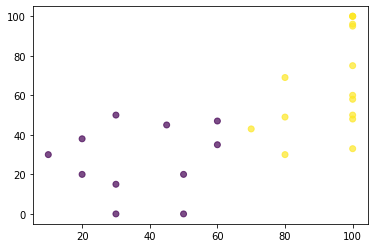

In [16]:
### 시각화 하기
plt.scatter(result['DB'],result["AND"], c=result["PREDICT"], alpha=0.7)

### 6. 최적의 k값 찾기

In [17]:
sse= []
K = range(1,8)

In [100]:
j = 8

In [101]:
km = KMeans(n_clusters=j)

In [102]:
km = km.fit(features)

In [103]:
sse.append(km.inertia_)

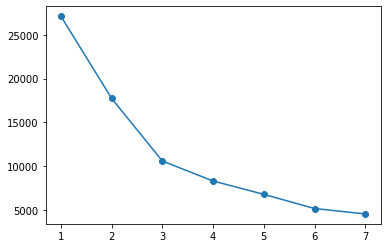

In [104]:
plt.plot(range(1,8),sse,marker="o")

In [18]:
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(features)
    sse.append(km.inertia_)

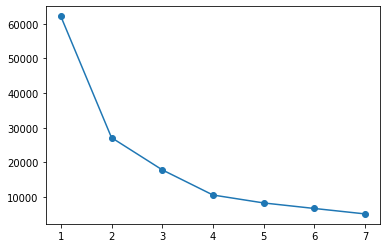

In [22]:
plt.plot(range(1,8),sse,marker="o")